最大最小算法是一种找出失败最大可能性中的最小值的算法，保守策略

In [1]:
import numpy as np

# 定义城市的位置 (x, y) 坐标
cities = np.array([
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 4],
    [5, 5]
])

# 定义一个函数来计算两个点之间的欧几里得距离
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# 初始化变量来存储最小的最大距离和相应的位置
min_max_distance = float('inf')
best_location = None

# 遍历每个可能的疾控中心位置（假设为城市的位置）
for location in cities:
    # 计算当前位置到所有城市的距离
    distances = np.array([euclidean_distance(location, city) for city in cities])
    # 找到当前位置到所有城市的最大距离
    max_distance = np.max(distances)
    
    # 更新最小的最大距离和最佳位置
    if max_distance < min_max_distance:
        min_max_distance = max_distance
        best_location = location

# 输出结果
print("最佳位置:", best_location)
print("最小的最大距离:", min_max_distance)



最佳位置: [3 3]
最小的最大距离: 2.8284271247461903


最佳位置: [3.08 4.14]
最小的最大距离: 5.299528280894422


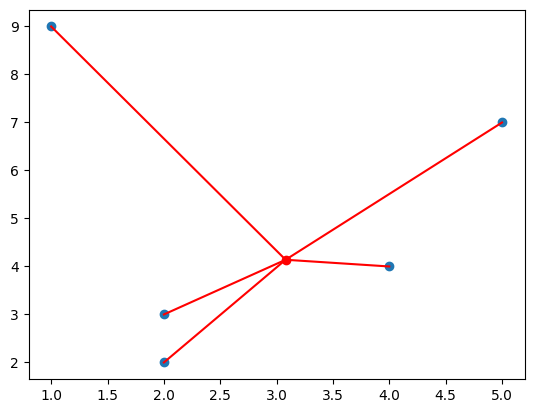

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# 定义城市的位置 (x, y) 坐标
cities = np.array([
    [1, 9],
    [2, 2],
    [2, 3],
    [4, 4],
    [5, 7]
])

# 欧几里得距离
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# 计算目标函数
def objective_function(p, cities):
    return np.max([euclidean_distance(p, city) for city in cities])

# 计算梯度
def gradient(p, cities):
    gradients = []
    for city in cities:
        diff = p - city
        distance = euclidean_distance(p, city)
        grad = diff / (distance if distance > 0 else 1)  # 避免除以零
        gradients.append(grad)
    return np.sign(np.mean(gradients, axis=0))  # 使用符号作为梯度方向

# 梯度下降
def gradient_descent(cities, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    # 初始化位置为城市坐标的平均值
    p = np.mean(cities, axis=0)
    prev_distance = float('inf')
    
    for _ in range(max_iterations):
        current_distance = objective_function(p, cities)
        if abs(prev_distance - current_distance) < tolerance:
            break
        prev_distance = current_distance
        p -= learning_rate * gradient(p, cities)
    
    return p, current_distance

# 运行梯度下降
best_location, min_max_distance = gradient_descent(cities)

# 输出结果
print("最佳位置:", best_location)
print("最小的最大距离:", min_max_distance)
plt.scatter(cities[:, 0], cities[:, 1])
# 绘制城市之间的连线
for i in cities:
    plt.plot([best_location[0], i[0]], [best_location[1], i[1]], color='red')
plt.scatter(best_location[0], best_location[1],color = 'r')
plt.show()